In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [74]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [8]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


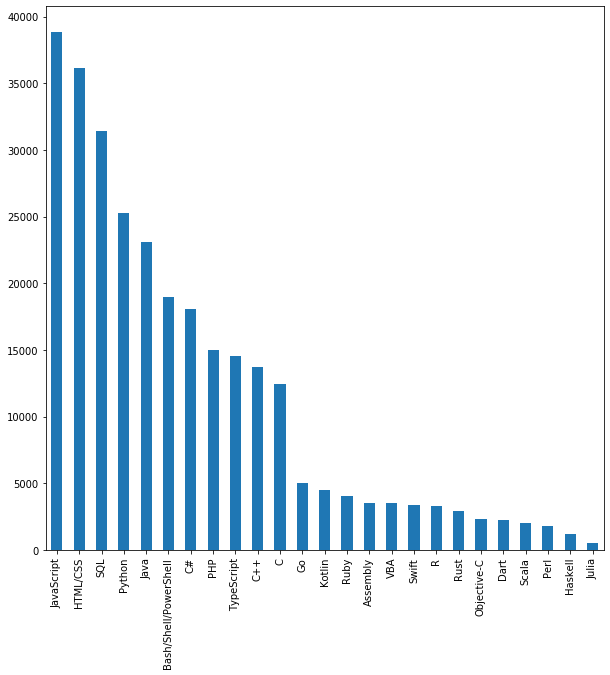

In [3]:
lang_df = df["LanguageWorkedWith"].str.split(";", expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
lang_df.plot(kind="bar")
plt.savefig('languages')

In [68]:
df = pd.DataFrame({'var1': ['a,b,c', 'd,e,f'], 'var2': [1, 2]})
df

,var1,var2
0,"a,b,c",1
1,"d,e,f",2


In [67]:
df.assign(var1=df['var1'].str.split(',')).explode('var1')

,var1,var2
0,a,1
0,b,1
0,c,1
1,d,2
1,e,2
1,f,2


In [138]:
devtype_df = df[(~df["ConvertedComp"].isna()) & (df["MainBranch"] == "I am a developer by profession")][["DevType", "ConvertedComp", "MainBranch"]]
devtype_df

,DevType,ConvertedComp,MainBranch
7,"Developer, back-end;Developer, desktop or ente...",116000.0,I am a developer by profession
9,"Database administrator;Developer, full-stack;D...",32315.0,I am a developer by profession
10,"Developer, back-end;Developer, desktop or ente...",40070.0,I am a developer by profession
11,"Designer;Developer, front-end",14268.0,I am a developer by profession
13,"Developer, desktop or enterprise applications;...",66000.0,I am a developer by profession
...,...,...,...
64141,"Database administrator;Developer, back-end;Dev...",129718.0,I am a developer by profession
64148,"Developer, QA or test",19428.0,I am a developer by profession
64152,"Developer, back-end;Developer, front-end;Devel...",200.0,I am a developer by profession
64153,"Developer, full-stack;Developer, QA or test;Sy...",15048.0,I am a developer by profession


In [124]:
for row in df[["MainBranch"]].drop_duplicates().iterrows():
    print(row[1]["MainBranch"])

I am a developer by profession
I code primarily as a hobby
I used to be a developer by profession, but no longer am
I am not primarily a developer, but I write code sometimes as part of my work
I am a student who is learning to code
nan


In [125]:
devtype_df = df[(~df["ConvertedComp"].isna()) & (df["MainBranch"] == "I am a developer by profession")][["DevType", "ConvertedComp"]]
devtype_df = devtype_df.dropna(subset=["ConvertedComp"], axis=0)
devtype_df = devtype_df.assign(DevType=devtype_df["DevType"].str.split(";", expand=True)).explode("ConvertedComp")
devtype_df

SyntaxError: invalid syntax (<ipython-input-125-5b7ea8720f8d>, line 1)

In [90]:
devtype_df

,DevType,ConvertedComp
7,"Developer, back-end;Developer, desktop or ente...",116000.0
9,"Database administrator;Developer, full-stack;D...",32315.0
10,"Developer, back-end;Developer, desktop or ente...",40070.0
11,"Designer;Developer, front-end",14268.0
12,"Designer;Developer, back-end",38916.0
...,...,...
64142,"Academic researcher;Developer, back-end;Educator",984.0
64148,"Developer, QA or test",19428.0
64152,"Developer, back-end;Developer, front-end;Devel...",200.0
64153,"Developer, full-stack;Developer, QA or test;Sy...",15048.0


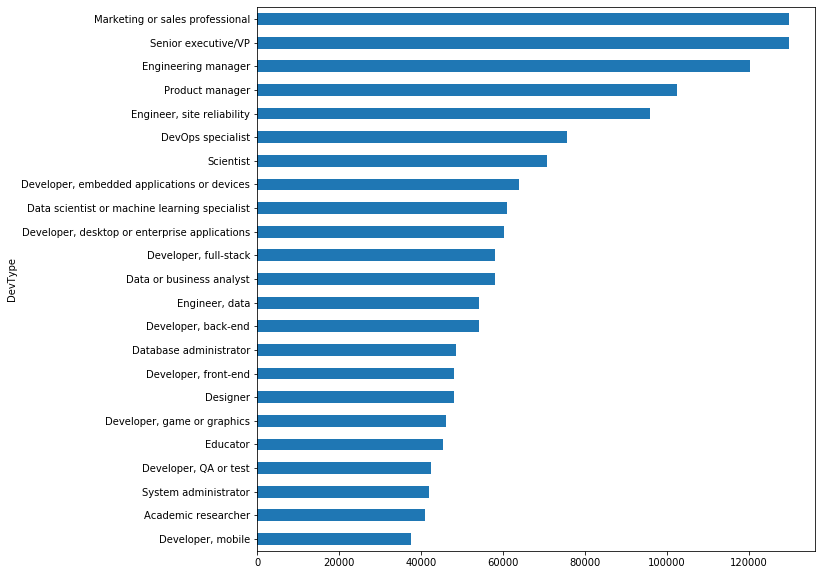

In [111]:
devtype_salary_df = devtype_df.groupby(["DevType"]).median()["ConvertedComp"].sort_values()
plt.figure(figsize=(10,10))
devtype_salary_df.plot(kind="barh")

In [110]:
devtype_salary_df

DevType
Developer, mobile                                 37686.0
Academic researcher                               41077.0
System administrator                              42000.0
Developer, QA or test                             42525.0
Educator                                          45396.0
Developer, game or graphics                       45996.0
Designer                                          48000.0
Developer, front-end                              48000.0
Database administrator                            48612.5
Developer, back-end                               54122.0
Engineer, data                                    54289.0
Data or business analyst                          58000.0
Developer, full-stack                             58000.0
Developer, desktop or enterprise applications     60171.0
Data scientist or machine learning specialist     60949.5
Developer, embedded applications or devices       64051.5
Scientist                                         70678.5
DevOps

In [100]:
devtype_salary_df

DevType
Developer, back-end;Developer, QA or test;DevOps specialist;Engineer, site reliability;Engineering manager;System administrator          0.0
Academic researcher;Data scientist or machine learning specialist;Developer, full-stack;Developer, QA or test                            0.0
Developer, back-end;Senior executive/VP;System administrator                                                                             0.0
Designer;Developer, desktop or enterprise applications;Developer, front-end;Senior executive/VP                                          0.0
Academic researcher;Product manager                                                                                                      0.0
                                                                                                                                     ...    
Data scientist or machine learning specialist;Developer, embedded applications or devices;Engineering manager                      2000000.0
Desig

In [82]:
devtype_df = df[~df["DevType"].isna()]["DevType"].str.split(";")
devtype_df

0        [Developer, desktop or enterprise applications...
1               [Developer, full-stack, Developer, mobile]
5        [Designer, Developer, front-end, Developer, mo...
6        [Developer, back-end, Developer, front-end, De...
7        [Developer, back-end, Developer, desktop or en...
                               ...                        
64448    [Developer, back-end, Developer, desktop or en...
64449                                  [Developer, mobile]
64451      [Data scientist or machine learning specialist]
64453    [Data or business analyst, Developer, mobile, ...
64456                                [Senior executive/VP]
Name: DevType, Length: 49370, dtype: object

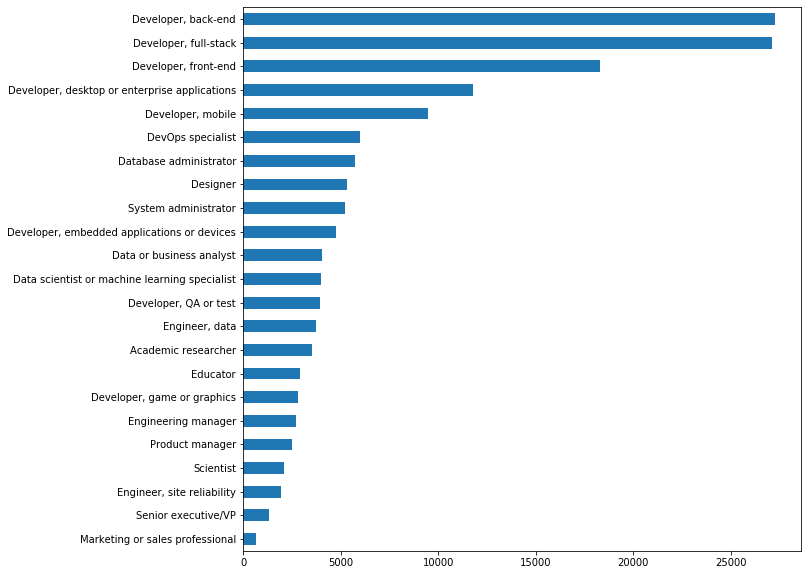

In [60]:
devtype_df = df[~df["DevType"].isna()]["DevType"].str.split(";", expand=True).stack().value_counts()
# plt.figure(figsize=(10,10))
# devtype_df.sort_values().plot(kind="barh")

In [22]:
job_prior_df/df["JobFactors"].count()

Languages, frameworks, and other technologies I’d be working with    0.513364
Office environment or company culture                                0.445419
Flex time or a flexible schedule                                     0.438834
Opportunities for professional development                           0.413808
Remote work options                                                  0.332550
dtype: float64

In [30]:
job_prior_df.devide(df["JobFactors"].count(),0)

AttributeError: 'Series' object has no attribute 'devide'

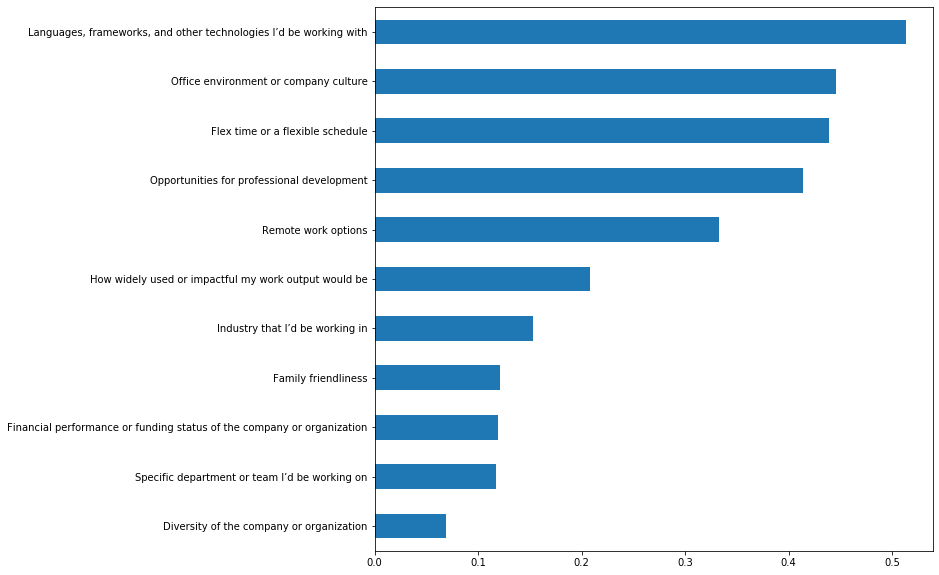

In [38]:
job_prior_df = df["JobFactors"].str.split(";", expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
(job_prior_df/df["JobFactors"].count()).sort_values().plot(kind="barh")

In [6]:
schema_df = pd.read_csv("./data/survey_results_schema.csv")
schema_df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [7]:
for k, v in dict(df.dtypes).items():
    print(k)

Respondent
MainBranch
Hobbyist
Age
Age1stCode
CompFreq
CompTotal
ConvertedComp
Country
CurrencyDesc
CurrencySymbol
DatabaseDesireNextYear
DatabaseWorkedWith
DevType
EdLevel
Employment
Ethnicity
Gender
JobFactors
JobSat
JobSeek
LanguageDesireNextYear
LanguageWorkedWith
MiscTechDesireNextYear
MiscTechWorkedWith
NEWCollabToolsDesireNextYear
NEWCollabToolsWorkedWith
NEWDevOps
NEWDevOpsImpt
NEWEdImpt
NEWJobHunt
NEWJobHuntResearch
NEWLearn
NEWOffTopic
NEWOnboardGood
NEWOtherComms
NEWOvertime
NEWPurchaseResearch
NEWPurpleLink
NEWSOSites
NEWStuck
OpSys
OrgSize
PlatformDesireNextYear
PlatformWorkedWith
PurchaseWhat
Sexuality
SOAccount
SOComm
SOPartFreq
SOVisitFreq
SurveyEase
SurveyLength
Trans
UndergradMajor
WebframeDesireNextYear
WebframeWorkedWith
WelcomeChange
WorkWeekHrs
YearsCode
YearsCodePro
